# Implementation of SVM in a custom dataset

# Import libraries

In [119]:
import numpy as np
import matplotlib.pyplot as plt #visualization
from sklearn import svm  #svm function
from sklearn.datasets import make_blobs #create data from library

# Create a custom training dataset

In [120]:
X,y=make_blobs(n_samples=10, centers=2,random_state=20) #40 lines with 2 centres each group 20 pieces data

In [121]:
print("Length of X:", len(X))
print("Length of Y:", len(y))

Length of X: 10
Length of Y: 10


In [122]:
print("Shape of X: ", np.shape(X))
print("Shape of y: ", np.shape(y))

Shape of X:  (10, 2)
Shape of y:  (10,)


# Load it to SVM

In [123]:
clf = svm.SVC(kernel='linear', C=1) # 2lines of codes seed=1 no regulizer , linear -2D only
clf.fit(X,y) 

SVC(C=1, kernel='linear')

# Visualize the data

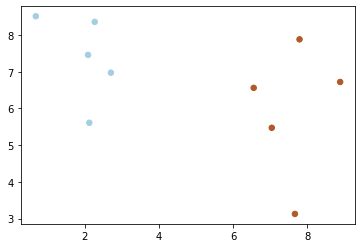

In [124]:
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired) #scatter plot just dots numpy array as X[:,0] - all rows only 1st value X Y plot, s=30 denotes the size of the dots, cmap for color
plt.show()

# Predict some unknown data

In [125]:
#prediction of new data
newData=[[3,4],[5,6]] 
print("Predicted Class for each of the data points: ",clf.predict(newData))

Predicted Class for each of the data points:  [0 1]


# Implementation of Decision Surface along with Support Vectors and margin

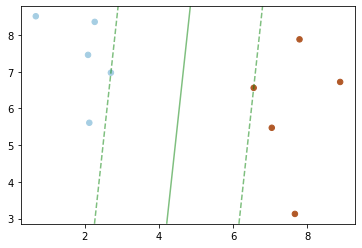

In [126]:
#fit the model
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X,y)
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired)

#plot the decision function
ax=plt.gca() 
xlim=ax.get_xlim() #get x-limit
ylim=ax.get_ylim() #get y-limit


#create grid to evaluate model
xx=np.linspace(xlim[0], xlim[1], 30) #create 30 points between 0 and 1
yy=np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy,xx)  #one array
xy=np.vstack([XX.ravel(), YY.ravel()]).T
Z= clf.decision_function(xy).reshape(XX.shape) #clf is support vector machine that is trained

#plot decison boundary and the support vectors
ax.contour(XX,YY, Z, colors='g', levels=[-1,0,1],
           alpha =0.5,
           linestyles=['--', '-','--'])
ax.scatter(clf.support_vectors_[:,0],
          clf.support_vectors_[:,1], s=100,
          linewidth=1, facecolors='none')
plt.show()

# Self-Supervised Learning

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.semi_supervised import LabelSpreading
from sklearn.semi_supervised import SelfTrainingClassifier

In [128]:
#Dataset ==> https://archive.ics.uci.edu/ml/datasets/iris
iris = datasets.load_iris()

X = iris.data[:100, :2]
y = iris.target[:100]

In [129]:
#visualizing iris dataset
print(iris.data[0]) # what are these values? 

print(y)

[5.1 3.5 1.4 0.2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [105]:
# step size in the mesh
h = 0.02

rng = np.random.RandomState(0)
y_rand = rng.rand(y.shape[0])# random probability value generation for each sample

print(y.shape[0],y_rand)

100 [0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152 0.79172504 0.52889492
 0.56804456 0.92559664 0.07103606 0.0871293  0.0202184  0.83261985
 0.77815675 0.87001215 0.97861834 0.79915856 0.46147936 0.78052918
 0.11827443 0.63992102 0.14335329 0.94466892 0.52184832 0.41466194
 0.26455561 0.77423369 0.45615033 0.56843395 0.0187898  0.6176355
 0.61209572 0.616934   0.94374808 0.6818203  0.3595079  0.43703195
 0.6976312  0.06022547 0.66676672 0.67063787 0.21038256 0.1289263
 0.31542835 0.36371077 0.57019677 0.43860151 0.98837384 0.10204481
 0.20887676 0.16130952 0.65310833 0.2532916  0.46631077 0.24442559
 0.15896958 0.11037514 0.65632959 0.13818295 0.19658236 0.36872517
 0.82099323 0.09710128 0.83794491 0.09609841 0.97645947 0.4686512
 0.97676109 0.60484552 0.73926358 0.03918779 0.28280696 0.12019656
 0.2961402  0.11872772 0.31798318 0.41426299 0.0641475  0.69247212
 0.56660145 0.26538949 0.52324805 0.09394051 0.5759465  0.929

In [106]:
y_30 = np.copy(y)
y_30[y_rand < 0.3] = -1  # set random samples to be unlabeled
print(y_30)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0  0  0  0  0  0
 -1  0 -1  0  0  0 -1  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0 -1 -1
  0  0  1  1  1 -1 -1 -1  1 -1  1 -1 -1 -1  1 -1 -1  1  1 -1  1 -1  1  1
  1  1  1 -1 -1 -1 -1 -1  1  1 -1  1  1 -1  1 -1  1  1  1  1 -1  1 -1 -1
  1 -1  1 -1]


In [107]:

y_50 = np.copy(y)
y_50[y_rand < 0.5] = -1
print(y_50)

[ 0  0  0  0 -1  0 -1  0  0 -1  0  0  0  0 -1 -1 -1  0  0  0  0  0 -1  0
 -1  0 -1  0  0 -1 -1  0 -1  0 -1  0  0  0  0  0 -1 -1  0 -1  0  0 -1 -1
 -1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -1  1 -1
  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1  1  1 -1  1 -1  1 -1 -1
  1 -1  1 -1]


# Label Propagation

In [108]:
#fit(X, y)==> #Fit a semi-supervised label propagation model to X.

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
ls30 = (LabelSpreading().fit(X, y_30), y_30, "Label Spreading 30% data")
ls50 = (LabelSpreading().fit(X, y_50), y_50, "Label Spreading 50% data")
ls100 = (LabelSpreading().fit(X, y), y, "Label Spreading 100% data")

# Self Training

In [117]:


# the base classifier for self-training is identical to the SVC
base_classifier = SVC(kernel="rbf", gamma=0.5, probability=True)
st30 = (
    SelfTrainingClassifier(base_classifier).fit(X, y_30),
    y_30,
    "Self-training 30% data",
)
st50 = (
    SelfTrainingClassifier(base_classifier).fit(X, y_50),
    y_50,
    "Self-training 50% data",
)

rbf_svc = (SVC(kernel="rbf", gamma=0.5).fit(X, y), y, "SVC with rbf kernel")



# Visualization of both methods at different % of unlabelled data points.

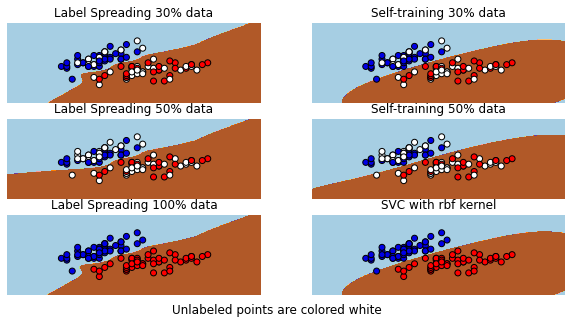

In [112]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

color_map = {-1: (1, 1, 1), 0: (0, 0, 0.9), 1: (1, 0, 0), 2: (0.8, 0.6, 0)}
plt.figure(figsize=(10, 5))
classifiers = (ls30, st30, ls50, st50, ls100, rbf_svc)
for i, (clf, y_train, title) in enumerate(classifiers):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(3, 2, i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis("off")

    # Plot also the training points
    colors = [color_map[y] for y in y_train]
    plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors="black")

    plt.title(title)

plt.suptitle("Unlabeled points are colored white", y=0.1)
plt.show()

# Varying the Threshold for Self Training

In [ ]:


# the base classifier for self-training is identical to the SVC
base_classifier = SVC(kernel="rbf", gamma=0.5, probability=True)
st30 = (
    SelfTrainingClassifier(base_classifier, threshold=0.99).fit(X, y_30),
    y_30,
    "Self-training 30% data",
)
st50 = (
    SelfTrainingClassifier(base_classifier).fit(X, y_50),
    y_50,
    "Self-training 50% data",
)

rbf_svc = (SVC(kernel="rbf", gamma=0.5).fit(X, y), y, "SVC with rbf kernel")



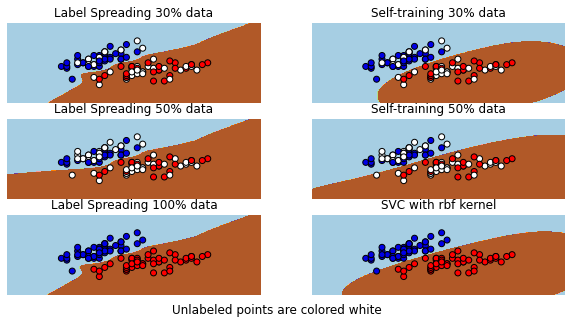

In [118]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

color_map = {-1: (1, 1, 1), 0: (0, 0, 0.9), 1: (1, 0, 0), 2: (0.8, 0.6, 0)}
plt.figure(figsize=(10, 5))
classifiers = (ls30, st30, ls50, st50, ls100, rbf_svc)
for i, (clf, y_train, title) in enumerate(classifiers):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(3, 2, i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis("off")

    # Plot also the training points
    colors = [color_map[y] for y in y_train]
    plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors="black")

    plt.title(title)

plt.suptitle("Unlabeled points are colored white", y=0.1)
plt.show()

# SSL for more than 3 classes

# PCA on IRIS Dataset

In [136]:
%matplotlib inline
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [137]:
sns.set()
sns.set(rc={"figure.figsize": (10, 8)})
PALETTE = sns.color_palette('deep', n_colors=3)
CMAP = ListedColormap(PALETTE.as_hex())
RANDOM_STATE = 42

## Load Dataset 

In [138]:
dataset = load_iris()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'

In [139]:
iris = pd.DataFrame(
    dataset.data,
    columns=features)

In [140]:
iris[target] = dataset.target

In [141]:
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Plotting Functions

In [142]:
def plot_iris_2d(x, y, title, xlabel="1st eigenvector", ylabel="2nd eigenvector"):
    sns.set_style("darkgrid")
    
    plt.scatter(x, y,
        c=iris['species'],
        cmap=CMAP,
        s=70)
    
    plt.title(title, fontsize=20, y=1.03)

    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)

In [143]:
def plot_iris_3d(x, y, z, title):
    sns.set_style('whitegrid')
    
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=110)
    
    ax.scatter(x, y, z,
               c=iris['species'],
               cmap=CMAP,
               s=40)
    
    ax.set_title(title, fontsize=20, y=1.03)
    
    fsize = 14
    ax.set_xlabel("1st eigenvector", fontsize=fsize)
    ax.set_ylabel("2nd eigenvector", fontsize=fsize)
    ax.set_zlabel("3rd eigenvector", fontsize=fsize)
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

# Plotting First 2 Features

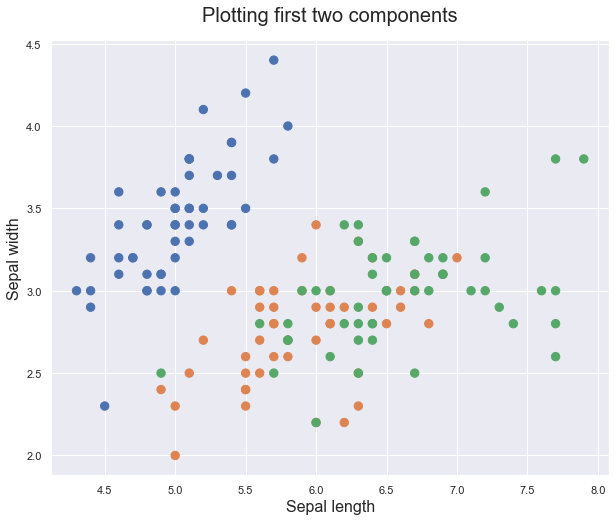

In [144]:
plot_iris_2d(
    x = iris['sepal_length'],
    y = iris['sepal_width'],
    title = 'Plotting first two components',
    xlabel = 'Sepal length',
    ylabel = 'Sepal width')

## PCA 2D Plot 

In [145]:
pca = PCA(n_components=2)
points = pca.fit_transform(iris[features])

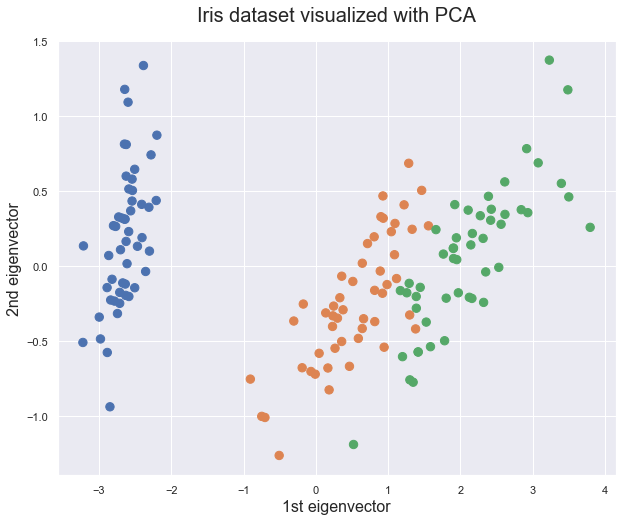

In [146]:
plot_iris_2d(
    x = points[:,0],
    y = points[:,1],
    title = 'Iris dataset visualized with PCA')

# t-SNE 2D Plot 

In [147]:
tsne = TSNE(n_components=2, n_iter=1000, random_state=RANDOM_STATE)
points = tsne.fit_transform(iris[features])

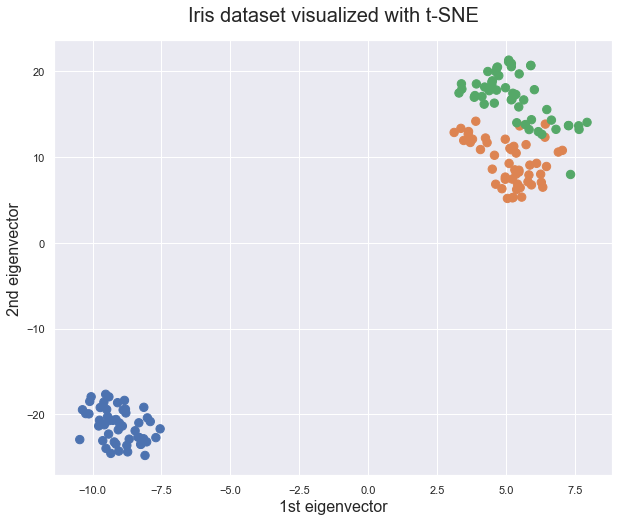

In [148]:
plot_iris_2d(
    x = points[:, 0],
    y = points[:, 1],
    title = 'Iris dataset visualized with t-SNE')

## PCA 3D Plot 

In [149]:
pca = PCA(n_components=3)
points = pca.fit_transform(iris[features])

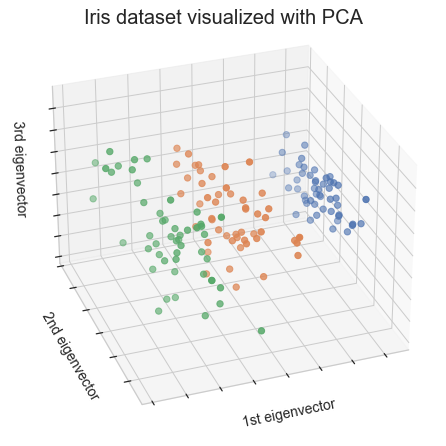

In [150]:
plot_iris_3d(
    x = points[:,0],
    y = points[:,1],
    z = points[:,2],
    title = "Iris dataset visualized with PCA")

## t-SNE 3D Plot 

In [151]:
tsne = TSNE(n_components=3, n_iter=5000, random_state=RANDOM_STATE)
points = tsne.fit_transform(iris[features])

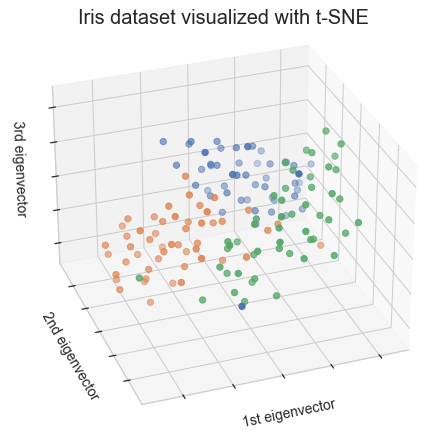

In [152]:
plot_iris_3d(
    x = points[:,0],
    y = points[:,1],
    z = points[:,2],
    title = "Iris dataset visualized with t-SNE")

In [ ]:
# Source: https://scikit-learn.org/stable/auto_examples/semi_supervised/plot_semi_supervised_versus_svm_iris.html
# Source: https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html
# Source: https://github.com/olekscode/Examples-PCA-tSNE/blob/master/Python/Visualizing%20Iris%20Dataset%20using%20PCA%20and%20t-SNE.ipynb